In [2]:
import pandas as pd
import numpy as np

## Import dataset

In [3]:
df = pd.read_csv("data/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Tentukan jumlah k / cluster

In [4]:
from kmodes.kprototypes import KPrototypes # algoritma yang akan digunakan karna didataset kita terdapat data kategorik,numerik
from tqdm.auto import tqdm # progress bar
import matplotlib.pyplot as plt

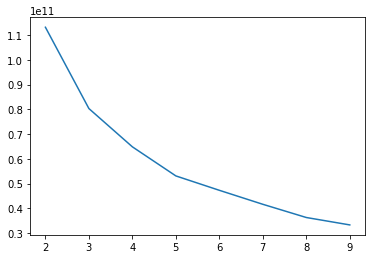

In [5]:
score = []
for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    model.fit(df, categorical=[0, 1])
    score.append(model.cost_)
plt.plot(range(2, 10), score)

## Training

In [6]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1])

In [7]:
df_pred = df.copy()
df_pred['Cluster'] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


## Analyze Cluster

In [8]:
num, cat = model.cluster_centroids_

In [11]:
df_cat = pd.DataFrame(cat, columns=df.columns[:2])
df_num = pd.DataFrame(num, columns=df.columns[2:])
df_cat.join(df_num)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,8341.612805,3779.893293,5152.173780,2577.237805,1720.573171,1136.542683
1,2,3,7751.981132,17910.509434,27037.905660,1970.943396,12104.867925,2185.735849
2,1,3,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847


In [12]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

- Cluster 1 : Pada cluster ini para pembeli cukup berhemat dalam melakukan suatu transaksi pembelian. <br>
- Cluster 2 : Pada cluster ini para pembeli cenderung menghabiskan uang nya pada pembelian Milk, Grocery, Detergents_Paper dan sedikit agak banyak pada pembelian Delicassen. <br>
- Cluster 3 : Pada cluster ini para pembeli cenderung membeli Fresh Food, Milk dan Delicassen.

## Popular conventional approach

Melakukan customer segmentation dengan tier sederhana memanfaatkan **RFM (Recency - Frequency - Monetary)
- Recency = Seberapa recent transaksinya(terakhir melakukan transaksi)
- Frequency = Seberapa sering transaksi
- Monetary = Seberapa besar transaksinya (bisa dalam satuan per tahun/bulan/minggu)